In [1]:
#import module folder containing general functions used frequently
modulepath = '/Users/mo2016/Documents/modelling/6eq/modules'
import sys
sys.path.append(modulepath)

#importing functions from that module folder
from parametercombination_analysis import *
from randomfunctions import wavelenght_from_dispersion, plot_highest_dispersion
from class_circuit_eq import *
from lhs import *
from findsteadystates_functions import *
from dispersionrelation_functions import *
# from lsafunctions import jacobianlsa


#other imports
import time
import datetime
import scipy.io
import numpy as np
from numpy import linalg as LA
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import re
#path of folder containing code, results, parameter files
path = '/Users/mo2016/Documents/modelling/6eq/parameter_space_search'
PCApath = '/Users/mo2016/Documents/modelling/6eq/PCA'

from datetime import date, timedelta

# date_yesterday = (date.today() - timedelta(2)).isoformat()
# date_yesterday = str(date.today())

# Functions for Data Analysis of parameter search output

In [2]:
circuit_n=2

This function obtains Turing IDs from all dataframes of that date and put them in a dictionary with their dataframe number.

TI/TII and monostable/multistable systems can be filtered



In [3]:
# turing_type indicates if we want the dictionary to contain only TI or also TI and TII. 
# ss_n indicates if we want only monostable systems in our dictionary (ss_n=1) or multistable (ss_n =/ 1).

def ID_df_location_search(date,turing_type,ss_n):
    ID_df_location = {}
    for df_n in range (64):
        with open(path + '/results/output/output_%s/output.%r-1'%(date,df_n), 'r') as input:
            input_ = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
        for line in input_:
                if turing_type == 'TI':
                    if 'Turing I ' in line:
                        ID = re.findall(r'\d+\.{0,1}\d*', line)
                        if ss_n==1: #to filter turing systems with only one steady state
                            ss_n_line = line.count('[')
                            if ss_n_line == 1:
                                ID_df_location[ID[0]] = df_n
                        else:
                            ss_n_line = line.count('[')
                            if ss_n_line > 1:
                                ID_df_location[ID[0]] = df_n

                if turing_type == 'TII':
                    if 'Turing II ' in line:
                        ID = re.findall(r'\d+\.{0,1}\d*', line)
                        if ss_n==1: #to filter turing systems with only one steady state
                            ss_n_line = line.count('[')
                            if ss_n_line == 1:
                                ID_df_location[ID[0]] = df_n
                        else:
                            ss_n_line = line.count('[')
                            if ss_n_line > 1:
                                ID_df_location[ID[0]] = df_n



                        
                if turing_type == 'TI-II': #option activated if interested in TII as well
                    if 'Turing I ' in line or 'Turing II ' in line:
                        ID = re.findall(r'\d+\.{0,1}\d*', line)
                        if ss_n==1:
                            ss_n_line = line.count('[')
                            if ss_n_line == 1:
                                ID_df_location[ID[0]] = df_n
                        else:
                            ss_n_line = line.count('[')
                            if ss_n_line > 1:
                                ID_df_location[ID[0]] = df_n
    

    return ID_df_location



This function takes the dictionary with IDs and dataframe number and creates a dataframe with all turing parameter sets of the search.

In [4]:
def dictionary_to_parameter_df(ID_df_location):
    turing_df = pd.DataFrame()
    for ID, df_n in ID_df_location.items():
        df_parameterfile_filename = 'df_parameterfile_%s_ID%r.pkl'%(date,df_n)
        df_parameterfile= pickle.load( open(path +  '/parameterfiles/df_parameterfile_%s/%s'%(date,df_parameterfile_filename), "rb" ) )
        turing_df = turing_df.append(df_parameterfile.iloc[int(ID)])
    return turing_df

# Code using functions for data analysis of parameter search

In [6]:
turing_df = pd.DataFrame()
if circuit_n==1:
    date_list = ['2020-10-05',  '2020-10-06', '2020-10-07', '2020-10-09', '2020-10-12', '2020-10-14',] #Circuit 1
if circuit_n==2:
    date_list = ['2020-11-25']

modification = ''
for date in date_list:
    ID_df_location = ID_df_location_search(date, 'TI', 1)
    turing_df = turing_df.append(dictionary_to_parameter_df(ID_df_location))
    print(len(turing_df))
turing_df.to_pickle(path + '/results/turing_dataframes/circuit%r%s_turingI_monostable_df.pkl'%(circuit_n,modification))

turing_df = pd.DataFrame()
for date in date_list:
    ID_df_location = ID_df_location_search(date, 'TI', 2)
    turing_df = turing_df.append(dictionary_to_parameter_df(ID_df_location))
    print(len(turing_df))

turing_df.to_pickle(path + '/results/turing_dataframes/circuit%r%s_turingI_multistable_df.pkl'%(circuit_n,modification))

turing_df = pd.DataFrame()
for date in date_list:
    ID_df_location = ID_df_location_search(date, 'TII', 1)
    turing_df = turing_df.append(dictionary_to_parameter_df(ID_df_location))
    print(len(turing_df))

turing_df.to_pickle(path + '/results/turing_dataframes/circuit%r%s_turingII_monostable_df.pkl'%(circuit_n,modification))

turing_df = pd.DataFrame()
for date in date_list:
    ID_df_location = ID_df_location_search(date, 'TII', 2)
    turing_df = turing_df.append(dictionary_to_parameter_df(ID_df_location))
    print(len(turing_df))
#
turing_df.to_pickle(path + '/results/turing_dataframes/circuit%r%s_turingII_multistable_df.pkl'%(circuit_n,modification))





39
51
105
94


# Specific parameter set


In [8]:
df_parameterfile_filename = 'df_parameterfile_2020-12-08_ID63.pkl'
df_parameterfile= pickle.load( open(path +  '/parameterfiles/df_parameterfile_%s/%s'%(date,df_parameterfile_filename), "rb" ) )
par_ID = 10812 
par_dict = df_parameterfile.iloc[par_ID].to_dict()
turing_output= detailed_turing_analysis_dict(par_dict,circuit_n)
steadystates,eigenvalues =turing_output[0][0], turing_output[4][0]
plot_highest_dispersion(eigenvalues)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mo2016/Documents/modelling/6eq/parameter_space_search/parameterfiles/df_parameterfile_2020-11-25/df_parameterfile_2020-12-08_ID63.pkl'

# Wavelenght distribution and relationship with dispersion

In [9]:
#calculating wavelenght of all parameter sets 
turing_df= pickle.load(open(path + '/results/turing_dataframes/circuit%r%s_turingI_monostable_df.pkl'%(circuit_n,modification),'rb'))

wavelenght_list = []
maxeig_list = []
for n in range(0,201):
    par_dict = turing_df.iloc[n].to_dict()
    turing_output= detailed_turing_analysis_dict(par_dict,circuit_n)
    steadystates,eigenvalues =turing_output[0][0], turing_output[4][0]
    wavelenght_list.append(wavelenght_from_dispersion(eigenvalues))
    maxeig_list.append(np.real(turing_output[2][0]))


[ 1.68743332  0.05251156  3.08575321  2.86167859 23.10830331  0.83654606]
Turing I pattern
[  0.2866827    3.76217414   1.32279533  27.63342565  76.78091376
 109.82903187]
Turing I pattern
[ 1.27721264  0.0419542   1.16958903  1.23677268 17.12091357  5.26182675]
Turing I pattern
[1.89200694e-01 9.14187616e-03 1.01355165e+00 1.85317049e+01
 1.79743877e+00 7.95965221e+00]
Turing I pattern
[  0.64435043   0.89990137   6.65301565  20.34841765   8.4459623
 130.56171852]
Turing I pattern
[  0.68513972   0.66830863   0.23144372  10.10376021 168.44748936
   4.43733682]
Turing I pattern
[ 1.12753971  0.17214063  8.47288596 22.18438487 72.26652871 48.58033833]
Turing I pattern
[  0.54093217   0.26966133   1.95309845  44.81296074 192.43719294
 124.90164956]
Turing I pattern
[0.06883673 0.43343307 1.24234374 4.95966411 0.1256887  5.46492051]
Turing I pattern
[4.77684650e-01 4.33579252e+00 3.07264321e+00 2.74576417e+03
 6.92556185e+01 2.39453498e+02]
Turing I pattern
[1.84325911e-01 5.95134551e+00 

IndexError: single positional indexer is out-of-bounds

In [14]:
for n,wvl in enumerate(maxeig_list):
    print (str(n) +':'+ str(wvl))

0:0.08518514304558195
1:0.0049030675662846785
2:0.023443486669962696
3:0.04863266290518515
4:0.004453781265538947
5:0.276068984603014
6:0.005302599566800426
7:0.021347102503966934
8:0.02031414551535008
9:0.006277950532264659
10:0.004359817052391915
11:0.009674699031952548
12:0.013571782478862877
13:0.06150124368163087
14:0.0020013587185170535
15:0.10450091699233047
16:0.003224342912636596
17:0.011504429237854752
18:0.004063815816545972
19:0.04417488791669399
20:0.004202468149739576
21:0.022667502271355416
22:0.4288845344927745
23:0.0677701261147069
24:0.07721954779313593
25:0.2471219121294698
26:0.01379604777890589
27:0.0025477124735798933
28:0.09359833268478708
29:0.005165594560157295
30:0.02070704846669605
31:0.6283386298338625
32:0.039030841343845324
33:0.014862278454575162
34:0.0012291741066544227
35:0.12054044193547879
36:0.003736276260326936
37:0.4351282618176165
38:0.006589283708392512


Wavelenght mean = 1.4047364739745904


(0.11855364552459989, 10.526315789473685)

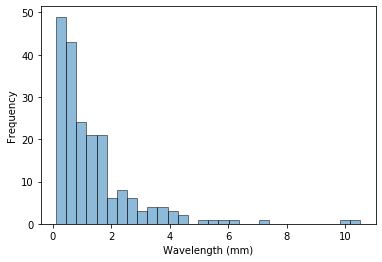

In [10]:
print('Wavelenght mean = ' +  str(np.mean(wavelenght_list)))
_=plt.hist(wavelenght_list,bins = 30, alpha = 0.5, histtype='bar', ec='black')
plt.xlabel('Wavelength (mm)')
plt.ylabel('Frequency')
np.amin(wavelenght_list), np.amax(wavelenght_list)

Text(0, 0.5, 'Dispersion height')

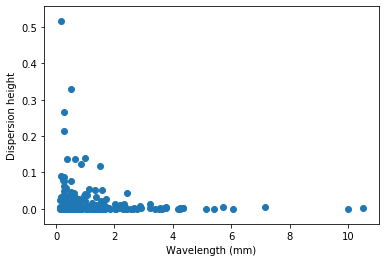

In [11]:
plt.scatter(wavelenght_list,maxeig_list)
plt.xlabel('Wavelength (mm)')
plt.ylabel('Dispersion height')

# Diffusion versus wavelength

In [12]:
d_B = turing_df['d_B'].tolist()
# len(wavelenght_list)
d_B[8]

0.001

Text(0, 0.5, 'd_B')

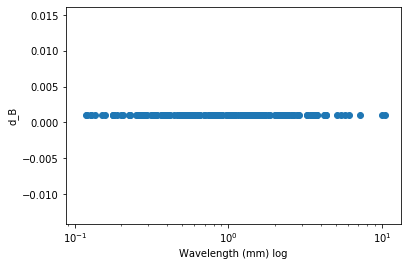

In [15]:
plt.scatter(wavelenght_list, d_B[:201])
plt.xscale('log')
plt.xlabel('Wavelength (mm) log')
plt.ylabel('d_B')

